In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("customers.csv")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
df=df.rename(columns={"Night Mins":"Night_Mins","Night Calls":"Night_Calls","Night Charge":"Night_Charge","Intl Mins":"Intl_Mins","Intl Calls":"Intl_Calls","Intl Charge":"Intl_Charge","CustServ Calls":"CustServ_Calls"})

In [22]:
df=df.rename(columns={"Churn?":"Churn","Account Length":"Account_Length","Int'l Plan":"Intl_Plan","VMail Plan":"VMail_Plan","VMail Message":"VMail_Message","Day Mins":"Day_Mins","Day Calls":"Day_Calls","Day Charge":"Day_Charge","Eve Calls":"Eve_Calls","Eve Mins":"Eve_Mins","Eve Charge":"Eve_Charge"})

In [23]:
df.head()

,State,Account_Length,Area Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,0,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,0,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,1,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,1,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [48]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
lb=LabelBinarizer()
le=LabelEncoder()
df.Intl_Plan=lb.fit_transform(df.Intl_Plan)
df.VMail_Plan=lb.fit_transform(df.VMail_Plan)
df.Churn = lb.fit_transform(df.Churn)
df.State=le.fit_transform(df.State)

In [49]:
df["Total_Mins"]=df["Day_Calls"]+df["Eve_Calls"]+df["Intl_Calls"]+df["Night_Calls"]

In [50]:
df["Total_Charge"]=df["Day_Charge"]+df["Eve_Charge"]+df["Intl_Charge"]+df["Night_Charge"]

In [52]:
df.head(5)

,Unnamed: 0,State,Account_Length,Area Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Total_Mins,Total_Charge
0,0,16,128,415,382-4657,0,1,25,265.1,110,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,1,35,107,415,371-7191,0,1,26,161.6,123,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,2,31,137,415,358-1921,0,0,0,243.4,114,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,3,35,84,408,375-9999,1,0,0,299.4,71,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,4,36,75,415,330-6626,1,0,0,166.7,113,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [53]:
df.to_csv("churn_preprocessed.csv")

In [1]:
#now preprocessing of data is done.
#now use preprocessed data for churn prediction
import pandas as pd
df=pd.read_csv("churn_preprocessed.csv")
df

,Unnamed: 0,Unnamed: 0.1,State,Account_Length,Area Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,...,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Total_Mins,Total_Charge
0,0,0,16,128,415,382-4657,0,1,25,265.1,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,1,1,35,107,415,371-7191,0,1,26,161.6,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,2,2,31,137,415,358-1921,0,0,0,243.4,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,3,3,35,84,408,375-9999,1,0,0,299.4,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,4,4,36,75,415,330-6626,1,0,0,166.7,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,3328,3,192,415,414-4276,0,1,36,156.2,...,279.1,83,12.56,9.9,6,2.67,2,0,292,60.10
3329,3329,3329,49,68,415,370-3271,0,0,0,231.1,...,191.3,123,8.61,9.6,4,2.59,3,0,239,63.53
3330,3330,3330,39,28,510,328-8230,0,0,0,180.8,...,191.9,91,8.64,14.1,6,3.81,2,0,264,67.74
3331,3331,3331,6,184,510,364-6381,1,0,0,213.8,...,139.2,137,6.26,5.0,10,1.35,2,0,336,57.53


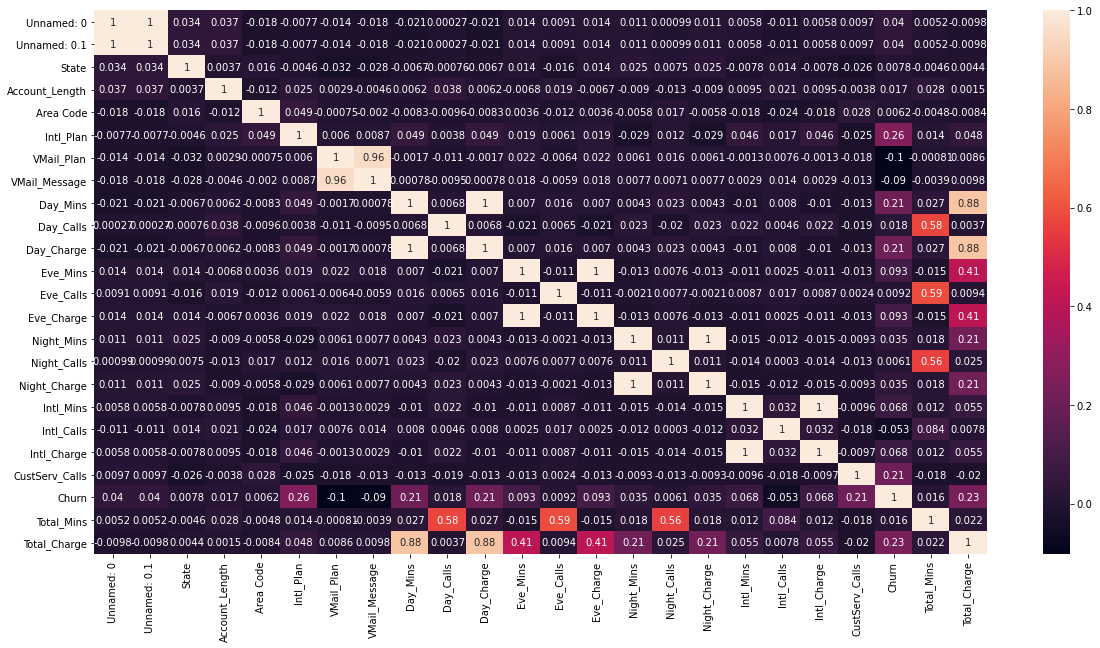

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [9]:
independent=df.columns
independent

Index(['Unnamed: 0', 'Unnamed: 0.1', 'State', 'Account_Length', 'Area Code',
       'Phone', 'Intl_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins',
       'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
       'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls',
       'Intl_Charge', 'CustServ_Calls', 'Churn', 'Total_Mins', 'Total_Charge'],
      dtype='object')

In [10]:
independent=df.columns
independent=independent.delete(0)
independent=independent.delete(0)
independent=independent.delete(3)
independent

Index(['State', 'Account_Length', 'Area Code', 'Intl_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn',
       'Total_Mins', 'Total_Charge'],
      dtype='object')

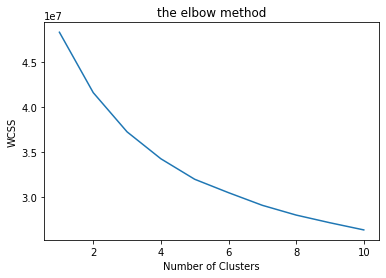

In [11]:
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df[independent])
    wcss.append(kmeans.inertia_)

    
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

    


In [12]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=7)


In [13]:
model.fit(df[independent])
#Predict Clusters using KMeans
df["Cluster_Labels"]=model.predict(df[independent])
df.head(3)

,Unnamed: 0,Unnamed: 0.1,State,Account_Length,Area Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,...,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Total_Mins,Total_Charge,Cluster_Labels
0,0,0,16,128,415,382-4657,0,1,25,265.1,...,91,11.01,10.0,3,2.70,1,0,303,75.56,0
1,1,1,35,107,415,371-7191,0,1,26,161.6,...,103,11.45,13.7,3,3.70,1,0,332,59.24,3
2,2,2,31,137,415,358-1921,0,0,0,243.4,...,104,7.32,12.2,5,3.29,0,0,333,62.29,4


In [14]:
df["Cluster_Labels"].value_counts()

3    541
1    530
4    526
2    466
0    458
6    412
5    400
Name: Cluster_Labels, dtype: int64

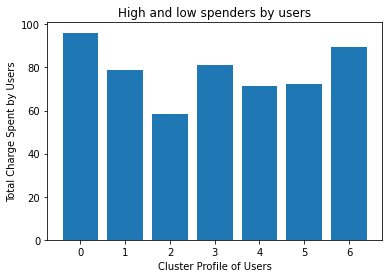

In [15]:
plt.bar(df["Cluster_Labels"],df.Total_Charge)
plt.xlabel("Cluster Profile of Users")
plt.ylabel("Total Charge Spent by Users")
plt.title("High and low spenders by users")
plt.show()

In [18]:
#Performing SQL Like Operations on Dataframe
high_spenders = df[df["Cluster_Labels"]==0]
high_spenders_phone=high_spenders["Phone"]
high_spenders_phone

0       382-4657
15      351-7269
35      362-1407
61      405-3371
66      329-9847
          ...   
3301    417-1488
3305    406-8445
3307    398-3632
3322    409-1856
3332    400-4344
Name: Phone, Length: 458, dtype: object